## Poll
___

<br> 

#### General setup
___

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as ss

%matplotlib inline

<br>

#### Loading the data set
___

In [2]:
# Load the csv file
poll = pd.read_csv('../Data/poll.csv')
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [3]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [4]:
# count votes for Brown and Green
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

<br>

#### Data simulation
___

In [5]:
def sample(brown, n=1000):
    """ Function for a sample simulation """
    return pd.DataFrame({'vote':np.where(np.random.rand(n) < brown, 'Brown', 'Green')})

In [6]:
# Run the data set simulation and count the votes
s = sample(0.51, n=1000)
s.vote.value_counts(normalize=True)

Brown    0.51
Green    0.49
Name: vote, dtype: float64

In [7]:
# Count different sample votes 1000 times and store them in a dataframe
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

In [8]:
dist.head()

,Brown,Green
vote,0.503,0.497
vote,0.485,0.515
vote,0.515,0.485
vote,0.512,0.488
vote,0.517,0.483


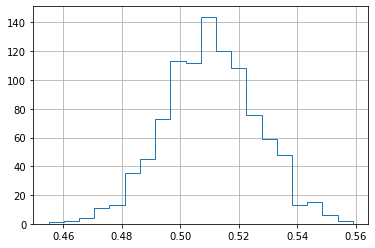

In [9]:
# Check the histogram
dist.Brown.hist(histtype='step', bins=20);

For True Brown fraction of 0.51 we may obtain any sample proportion from 0.48 to 0.55. The converse must be true also so 0.51 observed on the plot may actually originate from the Green majority. To make this more precise we need to use a confidence interval. It formed from the data in such a way that 95% of the times it will include the true values.

In [10]:
def samplingdist(brown, n=1000):
    """ Function that creates a dataframe of 1000 counted votes"""
    return pd.DataFrame([sample(brown).vote.value_counts(normalize=True) for i in range(n)])    

In [11]:
def quantiles(brown, n=1000):
    """ Function for quantile extraction (edges of confidence interval)
    for 95% confidence level which lies between 2.5 and 97.5 """
    
    dist = samplingdist(brown, n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [12]:
# Explore a number of values to find 0.51 on each end. 
quantiles(0.5), quantiles(0.48), quantiles(0.54)

((0.46697500000000003, 0.531), (0.448, 0.508025), (0.51, 0.57))

So for the observed sample proportion of 0.51 when a sample size of 1000 95% confidence interval for the two population function is 0.48 and 0.54. In other words, <br>
Estimate = 0.51 (point estimate) += 0.03 (margin error) (at 95% confidence).
We can increase it by increasing a sample size.

In [13]:
dist = samplingdist(0.5, 10000)

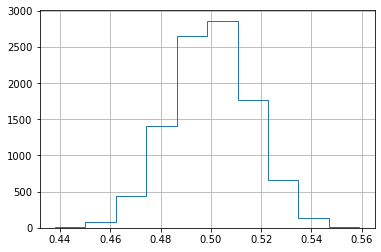

In [14]:
dist.Brown.hist(histtype='step', bins=20);

The plot shows the margin of error more like 1% which is sufficient to claim that Brown is a likely winner. Under very general conditions, the margin of error usually improves with a square root of a number of samples.

<br>

#### Comparison.
___

In [15]:
# Load a larger data set with actual votes to compare with the simulated data
largepoll = pd.read_csv('../Data/poll-larger.csv')
largepoll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


In [16]:
# Count the actual votes 
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

However, from collecting the 10000 votes we can see that Green is more likely winner. 

<br>

#### Hypothesis testing.
___

There is a close connection between hypothesis testing and confidence interval. If the null hypothesis corresponds with the range of values for the population parameter that are excluded from the confidence interval then the null hypothesis must be rejected with a very low P-value. The lower it is, the higher the confidence level of the interval.

In [17]:
# look again at our simulated data
dist.head()

,Green,Brown
vote,0.503,0.497
vote,0.506,0.494
vote,0.469,0.531
vote,0.497,0.503
vote,0.500,0.500


In [18]:
# corresponding p value 
100 - ss.percentileofscore(dist.Brown, 0.511)

24.67

This is certainly not enough to reject the null hypothesis (that Green wins). 

In [22]:
# look at the large poll data again
largepoll.value_counts(normalize=True)

vote 
Green    0.5181
Brown    0.4819
dtype: float64

In [19]:
# collect a sample this time for Green
dist = pd.DataFrame({'Green': [sample(0.50, 10000).vote.value_counts(normalize=True)['Green'] for i in range(1000)]})    

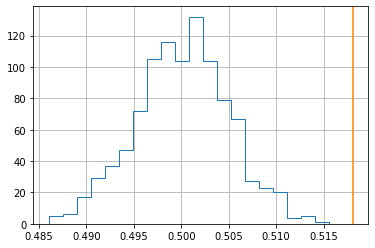

In [20]:
# let's see histogram for Green fraction and
# overlay it with Brown't fraction of 0.5181
dist.Green.hist(histtype='step', bins=20)
plt.axvline(0.5181, c='C1');

We can see that the Brown's fraction value is so extreme that it is not even included in the sampling distribution. We can conclude that the P-value for rejecting the null hypothesis that Brown wins is 1 over 1000 or less which qualifies as very significant.

<br>

___
#### End.